In [1]:
import os
try:
    import flexiblecc as fcc
except ImportError as e:
    !pip install flexiblecc
    import flexiblecc as fcc

if not os.path.exists("../../CalImgs/"):
    if not os.path.exists("Flexible-Camera-Calibration/CalImgs"):
        !git clone https://github.com/SimonLBSoerensen/Flexible-Camera-Calibration 
    datasetpath = "Flexible-Camera-Calibration/CalImgs/cam_0*"
else:
    datasetpath = "../../CalImgs/cam_0*"

In [2]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
color_cal_imgs_files = glob.glob(datasetpath)
color_cal_imgs = np.array([cv2.imread(f) for f in tqdm(color_cal_imgs_files)])
gray_cal_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in tqdm(color_cal_imgs)]

100%|██████████| 94/94 [00:00<00:00, 2094.48it/s]


In [4]:
pattern_size = (12, 12)

In [7]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, points_3D, points_2D = fcc.OldSchoolCC.calibrate_camera(gray_cal_imgs, pattern_size, verbose=1)

100%|██████████| 94/94 [00:11<00:00,  8.20it/s]
Doing camera calibrate


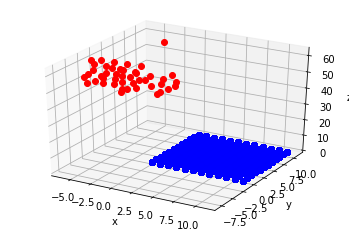

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


for i in range(0,5):
    cam1_points_3D = np.reshape(points_3D[i], (-1,3))

    ax.plot3D(cam1_points_3D[:,0], cam1_points_3D[:,1], cam1_points_3D[:,2], 'bo')
    ax.plot3D(tvecs[i][0], tvecs[i][1], tvecs[i][2], 'ro')

plt.show()

In [59]:
rvecs = np.array(rvecs)
tvecs = np.array(tvecs)

In [152]:
n_images = 94
grid_width = 12
grid_height = 12
grid_size = grid_width * grid_height

grid = np.zeros((grid_size, 3))
meshgrid = np.transpose(np.meshgrid(np.arange(0,12),np.arange(0,12)))

meshgrid = np.reshape(meshgrid, (grid_size, 2))

grid[:, 1:] = meshgrid
grid = np.reshape(grid, grid.shape+(1,))

forward_projected_rays = np.ndarray((n_images, grid_size, 3, 1))
for i,(r,t) in enumerate(zip(rvecs, tvecs)):
    rotation_matrix = cv2.Rodrigues(r)[0]
    for j in range(grid_size):
        forward_projected_rays[i,j] = np.dot(rotation_matrix.T, grid[j]) + t

In [147]:
temp = np.array(forward_projected_rays)



In [151]:
print(grid.shape)
print(forward_projected_rays.shape)
print(rvecs.shape)
print(tvecs.shape)
print(temp+forward_projected_rays)

(144, 3, 1)
(94, 144, 3, 1)
(94, 3, 1)
(94, 3, 1)
[[[[ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[-7.13438276e-02]
   [-4.45775169e-01]
   [ 1.36315121e+00]]

  [[-1.42687655e-01]
   [-8.91550339e-01]
   [ 2.72630242e+00]]

  ...

  [[ 4.51070033e-01]
   [ 1.42928297e+01]
   [ 7.36483404e+00]]

  [[ 3.79726205e-01]
   [ 1.38470545e+01]
   [ 8.72798525e+00]]

  [[ 3.08382377e-01]
   [ 1.34012794e+01]
   [ 1.00911365e+01]]]


 [[[ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 1.58750401e-01]
   [-5.80872495e-01]
   [ 1.58576270e+00]]

  [[ 3.17500802e-01]
   [-1.16174499e+00]
   [ 3.17152541e+00]]

  ...

  [[ 2.69996783e-01]
   [ 6.82629663e+00]
   [ 7.88226690e+00]]

  [[ 4.28747184e-01]
   [ 6.24542413e+00]
   [ 9.46802960e+00]]

  [[ 5.87497584e-01]
   [ 5.66455164e+00]
   [ 1.10537923e+01]]]


 [[[ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 5.68477176e-01]
   [-5.11346395e-01]
   [ 1.62215071e+00]]

  [[ 1.13695435e+00]
 

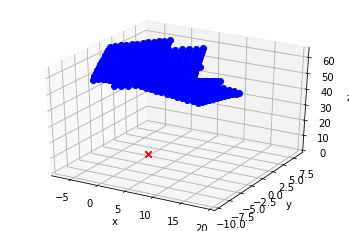

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


for i in range(0,5):
    cam1_points_3D = np.reshape(forward_projected_rays[i], (-1,3))

    ax.plot3D(cam1_points_3D[:,0], cam1_points_3D[:,1], cam1_points_3D[:,2], 'bo')
    ax.plot3D([0],[0],[0], 'rx')

plt.show()